# Alpha and Beta

Capital Asset Pricing Model
* $E(R_i) = R_f+B_i(E(R_m)-R_f)$
 * $E(R_i)$ - expected return in stock
 * $E(R_f)$ - risk-free rate
 * $E(R_m)$ - expected market return
 * $R_m - R_f$ - market risk premium
 * $B_i$ - measure of stock's market risk or sensitivity
   * Beta: $B_i = \frac{Cov(R_i, R_m)}{Var(R_m)} = \rho_{i,m}\frac{\sigma_{i}}{\sigma_m}$

* Relationship between the excess stock returns and the excess market returns:
 * $R_i-R_f = a+B_i(R_m-R_f)$

* Portfolio Beta: $B$ = $\sum_{i=1}^{n}$$w_iB_i$
 * $w_i$ = $\frac{v_i}{\sum_{i=1}^{n}
v_i}$
 * $v_i$ - Portfolio's value of stock $i$

Arbitrage Pricing Theory
* $E(R_i) = a_i + B_{i,1}F_1+B_{i,2}F_2+B_{i,j}F_j$
 * $E(R_i)$ - expected rate of return on security $i$
 * $α_i$ - alpha; expected return on stock $i$ for factors that are negligible (implies no sensitivity to the market)
 * $β_{i,j}$ - sensitivity of the $i$th asset to the $j$th factor
 * $F_j$ - value of the $j$th factor that influences the return on stock $i$
 * A perfect portfolio would have a Beta close to zero with a very large positive alpha.

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
import scipy as sp
from scipy import stats
import statsmodels.formula.api as sm
import pylab

In [ ]:
today = datetime.today()
days = timedelta(days=450)
start = today-days

In [ ]:
print('start:', start, '\t', 'end:', today)

start: 2020-10-15 21:42:18.114219 	 end: 2022-01-08 21:42:18.114219


In [ ]:
aapl = yf.download('AAPL', start, today)
amzn = yf.download('AMZN', start, today)
ge = yf.download('GE', start, today)
SP500 = yf.download('^GSPC', start, today) # S&P 500 ticker

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
aapl = aapl['Adj Close']
aapl = aapl.pct_change(1)
aapl.dropna(inplace=True)

amzn = amzn['Adj Close']
amzn = amzn.pct_change(1)
amzn.dropna(inplace=True)

ge = ge['Adj Close']
ge = ge.pct_change(1)
ge.dropna(inplace=True)

SP500 = SP500['Adj Close']
SP500 = SP500.pct_change(1)
SP500.dropna(inplace=True)

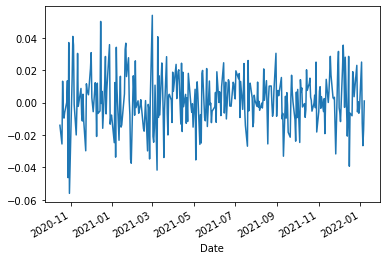

In [ ]:
# plot of AAPL returns
aapl.plot()

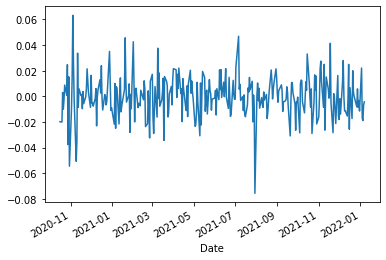

In [ ]:
# plot of AMZN returns
amzn.plot()

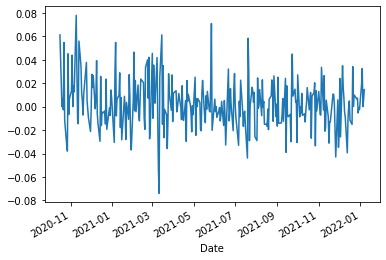

In [ ]:
# plot of GE returns
ge.plot()

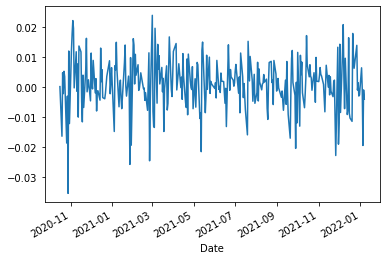

In [ ]:
# plot of SP500 returns
SP500.plot()

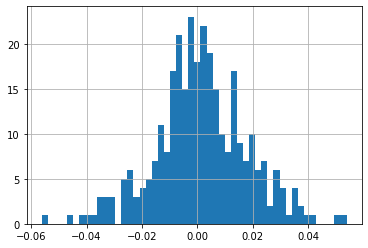

In [ ]:
# Distribution plot of AAPL returns
aapl.hist(bins=50)

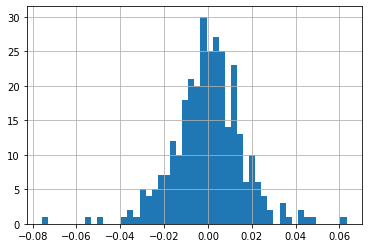

In [ ]:
# Distribution plot of AMZN returns
amzn.hist(bins=50)

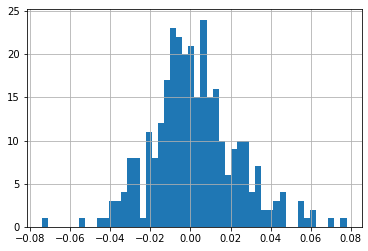

In [ ]:
# Distribution plot of GE returns
ge.hist(bins=50)

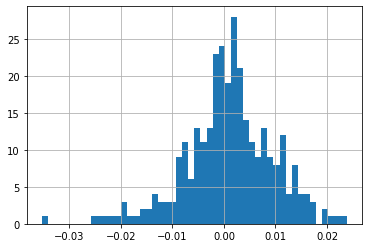

In [ ]:
# Distribution plot of SP500 returns
SP500.hist(bins=50)

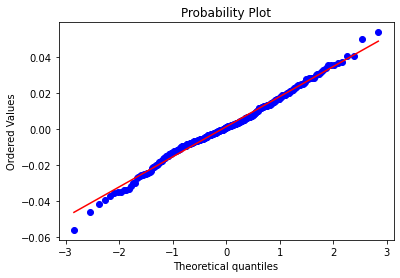

In [ ]:
# QQPlot of AAPL returns
stats.probplot(aapl, dist="norm", plot=pylab)
pylab.show()

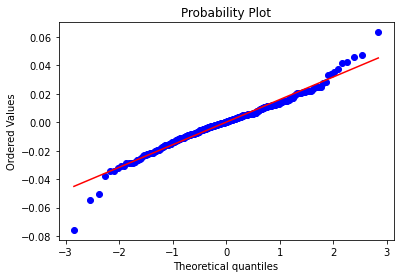

In [ ]:
# QQPlot of AMZN returns
stats.probplot(amzn, dist="norm", plot=pylab)
pylab.show()

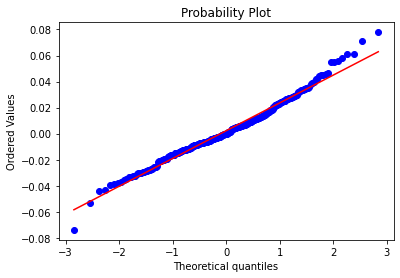

In [ ]:
# QQPlot of GE returns
stats.probplot(ge, dist="norm", plot=pylab)
pylab.show()

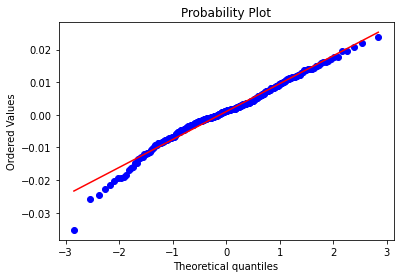

In [ ]:
# QQPlot of SP500 returns
stats.probplot(SP500, dist="norm", plot=pylab)
pylab.show()

In [ ]:
(aapl_beta,aapl_alpha,aapl_r_value,aapl_p_value,apple_std_err)=stats.linregress(SP500,aapl)
print(f"Apple Beta: {aapl_beta}, Apple Alpha: {aapl_alpha}")
print("R-squared=", aapl_r_value**2)
print("p-value =", aapl_p_value)
print("standard error", apple_std_err)

Apple Beta: 1.3037055546855247, Apple Alpha: 2.2531835804882015e-05
R-squared= 0.45077283626042786
p-value = 5.6292693381778567e-42
standard error 0.08199762871143387


In [ ]:
(amzn_beta,amzn_alpha,amzn_r_value,amzn_p_value,amzn_std_err)=stats.linregress(SP500,amzn)
print(f"Amazon Beta: {amzn_beta}, Amazon Alpha: {amzn_alpha}")
print("R-squared=", amzn_r_value**2)
print("p-value =", amzn_p_value)
print("standard error", amzn_std_err)

Amazon Beta: 1.0330865400592983, Amazon Alpha: -0.0009779815038462993
R-squared= 0.30736143081557954
p-value = 2.230554655205929e-26
standard error 0.08836697655556873


In [ ]:
(ge_beta,ge_alpha,ge_r_value,ge_p_value,ge_std_err)=stats.linregress(SP500,ge)
print(f"GE Beta: {ge_beta}, GE Alpha: {ge_alpha}")
print("R-squared=", ge_r_value**2)
print("p-value =", ge_p_value)
print("standard error", ge_std_err)

GE Beta: 0.9138159319538123, GE Alpha: 0.001314852439248974
R-squared= 0.13485734358038204
p-value = 2.4849512836290132e-11
standard error 0.13188333771366922


# Risk and Performance Measures



Sharpe Ratio:

SR = $\frac{\overline{R}-\overline{R_f}}{\sigma}$ = $\frac{\overline{R}-\overline{R_f}}{\sqrt{var(\overline{R}-\overline{R_f})}}$
* SR - Sharpe Ratio
 * Annual Sharpe Ratio of 0-1 is condsidered sub-optimal
 * Annual Sharpe Ratio of 1-2 is condsidered good
 * Annual Sharpe Ratio of 2-3 is condsidered very good
 * Annual Sharpe Ratio above 3 is condsidered excellent
* $\overline{R}$ - mean return for a portfolio or a stock
* $\overline{R_f}$ - mean return for a risk-free security
* $\sigma$ - standard deviation (variance) of the portfolio or stock returnd

In [ ]:
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data.mean()
    std = data.std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return sharpe_ratio

In [ ]:
# aapl sharpe ratio 
daily_sharp_ratio = compute_sharpe_ratio(aapl)
print(f"The daily sharpe ratio for this stock is {daily_sharp_ratio}")

annual_sharp_ratio = np.sqrt(252) * daily_sharp_ratio
print(f"The yearly sharpe ratio for this stock is {annual_sharp_ratio}")

The daily sharpe ratio for this stock is 0.07846651994439179
The yearly sharpe ratio for this stock is 1.2456173881053025


In [ ]:
# amzn sharpe ratio 
daily_sharp_ratio = compute_sharpe_ratio(amzn)
print(f"The daily sharpe ratio for this stock is {daily_sharp_ratio}")

annual_sharp_ratio = np.sqrt(252) * daily_sharp_ratio
print(f"The yearly sharpe ratio for this stock is {annual_sharp_ratio}")

The daily sharpe ratio for this stock is 0.002660790882418515
The yearly sharpe ratio for this stock is 0.04223874579376497


In [ ]:
# ge sharpe ratio 
daily_sharp_ratio = compute_sharpe_ratio(ge)
print(f"The daily sharpe ratio for this stock is {daily_sharp_ratio}")

annual_sharp_ratio = np.sqrt(252) * daily_sharp_ratio
print(f"The yearly sharpe ratio for this stock is {annual_sharp_ratio}")

The daily sharpe ratio for this stock is 0.10361300062637503
The yearly sharpe ratio for this stock is 1.644805393503408


In [ ]:
# sp500 sharpe ratio 
daily_sharp_ratio = compute_sharpe_ratio(SP500)
print(f"The daily sharpe ratio for SP500 is {daily_sharp_ratio}")

annual_sharp_ratio = np.sqrt(252) * daily_sharp_ratio
print(f"The yearly sharpe ratio for SP500 is {annual_sharp_ratio}")

The daily sharpe ratio for SP500 is 0.11486129599561475
The yearly sharpe ratio for SP500 is 1.8233665468258544


## Probabilistic Sharpe Ratio

The problem of the sharpe ratio is, that it is calculated via historical data and thus it only yields an estimation and not the true sharpe ratio!

To tackle this problem you can use the *Probabilistic Sharpe Ratio* 
defined as 
$$ \text{cdf} \Big( \frac{(\widehat{\text{SR}} - SR^*)}{\widehat{\sigma}({\widehat{SR})}} \Big)$$
where cdf is the cummulative density function of the normal function, <br />
$\widehat{SR}$ is the original sharpe ratio,<br />
$SR^*$ is the benchmark sharpe ratio (often 0), <br />
and $\hat{\sigma}(\widehat{SR})$ is the standard deviation of the estimated sharpe ratio which is computed as follows:

$$ \hat{\sigma}(\hat{SR}) = \sqrt{\frac{1}{n-1} \Big (1 + \frac{1}{2} \widehat{\text{SR}}^2 - \gamma_3 \hat{\text{SR}} + \frac{\gamma_4}{4} \widehat{\text{SR}}^2 \Big )} $$

Here, $\gamma_3$ and $\gamma_4$ correspond to skew and fisher kurtosis.

In words, the probabilistic sharpe ratio computes the propability that the true sharpe ratio is $\leq$ the estimated sharpe ratio ($PSR = P(SR \leq \widehat{\text{SR}})$) given the benchmark sharpe ratio.

In [ ]:
import scipy.stats

In [ ]:
def compute_prob_sharpe_ratio(data, benchmark=0):
    
    sr = compute_sharpe_ratio(data, 0)
    
    skew = scipy.stats.skew(data)
    # Use fisher kurtosis
    
    kurtosis = scipy.stats.kurtosis(data, fisher=True)  
    
    n = len(data)
    
    std = ( (1 / (n-1)) * (1 + 0.5 * sr**2 - skew * sr + (kurtosis / 4) * sr**2))**0.5
    
    ratio = (sr - benchmark) / std
    prob_sharpe_ratio = scipy.stats.norm.cdf(ratio)
    return prob_sharpe_ratio

In [ ]:
# aapl probabilistic sharpe ratio 

psr_stk = compute_prob_sharpe_ratio(aapl)

print(f"The daily probabilistic sharpe ratio for this stock is {psr_stk}")

annual_psr = np.sqrt(252) * psr_stk
print(f"The yearly probabilistic sharpe ratio for this stock is {annual_psr}")

The daily probabilistic sharpe ratio for this stock is 0.9152037106186515
The yearly probabilistic sharpe ratio for this stock is 14.528408503562853


In [ ]:
# amzn probabilistic sharpe ratio 

psr_stk = compute_prob_sharpe_ratio(amzn)

print(f"The daily probabilistic sharpe ratio for this stock is {psr_stk}")

annual_psr = np.sqrt(252) * psr_stk
print(f"The yearly probabilistic sharpe ratio for this stock is {annual_psr}")

The daily probabilistic sharpe ratio for this stock is 0.5186476035216069
The yearly probabilistic sharpe ratio for this stock is 8.233275461986796


In [ ]:
# ge probabilistic sharpe ratio 

psr_stk = compute_prob_sharpe_ratio(ge)

print(f"The daily probabilistic sharpe ratio for this stock is {psr_stk}")

annual_psr = np.sqrt(252) * psr_stk
print(f"The yearly probabilistic sharpe ratio for this stock is {annual_psr}")

The daily probabilistic sharpe ratio for this stock is 0.9676999128983383
The yearly probabilistic sharpe ratio for this stock is 15.361759879607213


# Portfolio Optimization

**Portfolio Theory**

$ {R}_p = Σ_{i}^nw_iR_i$
* $R_p$ - portfolio return
* $w_i$ - weight of stock $i$
* $R_{i}$ - return of stock $i$

$ \overline{R}_p = Σ_{i}^nw_i\overline{R}_i$
* $ \overline{R}_p$ - mean or expected portfolio return
* $\overline{R}_i$ - mean or expected return for stock $i$

$\sigma^2_p = \Sigma_i^n\Sigma_j^nw_iw_j\sigma_{ij}$
* $\sigma^2_p$ - portfolio variance
* $w_{i}$ - weight of stock $i$
* $\sigma_i\sigma_j$ - covariance between stock $i$ and $j$

Stock $i$ variance: $\sigma^2_i =\frac{\sum_{i}^n(R_{i}-\overline{R}_i)^2}{n-1}$

Stock $i$ standard deviation: $\sigma_i = \sqrt{\sigma_i^2}$

Covariance between stocks $i$ and $j$: $\sigma_{i,j} = \frac{\sum_{i}^n(R_{i}-\overline{R}_i)(R_{j}-\overline{R}_j)}{n-1}$

Correlation between stocks $i$ and $j$: $ρ_{i,j} = \frac{σ_{i,j}}{σ_i*σ_j}$

**VaR Normal Distribution Method**

normal distribution:

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(X-\mu)^2}{2\sigma^2}}$

* $f(x)$ - density function
* $x$ - input variable
* $\mu$ - mean
* $\sigma$ - standard deviation

General form to estimate VaR: VaR = $position*(\mu_{period}-z*\sigma_p)$

* VaR  - value at risk
* position - current market value of portfolio
* $\mu_{period}$ - expected period return
* $z$ - confidence level cut-off point
* σ - volatility of portfolio

For a normal distribution,  $z$=2.33 for a 99% confidence level, and $z$=1.64 for a 95% confidence level.

In [ ]:
stk1 = 'EBAY'
stk1 = yf.download(stk1, start, today)
stk1 = stk1['Adj Close']

stk2 = 'UA'
stk2 = yf.download(stk2, start, today)
stk2 = stk2['Adj Close']

stk3 = 'NKE'
stk3 = yf.download(stk3, start, today)
stk3 = stk3['Adj Close']

stk4 = 'BBY'
stk4 = yf.download(stk4, start, today)
stk4 = stk4['Adj Close']

stk5 = 'aapl'
stk5 = yf.download(stk5, start, today)
stk5 = stk5['Adj Close']

stk6 = 'amzn'
stk6 = yf.download(stk6, start, today)
stk6 = stk6['Adj Close']

stk7 = 'ge'
stk7 = yf.download(stk7, start, today)
stk7 = stk7['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stk_portfolio = pd.concat([stk1,stk2,stk3,stk4, stk5, stk6, stk7],axis=1)
stk_portfolio.columns = ['EBAY','UA','NKE','BBY', 'AAPL', 'AMZN', 'GE']

In [ ]:
stk_portfolio_returns = stk_portfolio.pct_change(1).dropna()

In [ ]:
stk_portfolio_returns

,EBAY,UA,NKE,BBY,AAPL,AMZN,GE
Date,,,,,,,
2020-10-16,0.007762,0.003552,-0.007752,-0.010036,-0.014001,-0.019750,0.061135
2020-10-19,-0.027046,0.023009,-0.004453,0.012401,-0.025542,-0.020014,0.000000
2020-10-20,-0.002209,0.019031,0.008318,0.000497,0.013192,0.003056,0.006859
2020-10-21,-0.025461,0.028014,0.007315,-0.018198,-0.005446,-0.009969,-0.002725
2020-10-22,-0.010034,0.026424,0.004559,-0.010363,-0.009583,-0.002681,0.054645
...,...,...,...,...,...,...,...
2022-01-03,0.004511,0.001663,-0.012000,0.005118,0.025004,0.022118,0.018736
2022-01-04,-0.024850,0.007748,0.010445,0.029573,-0.012692,-0.016916,0.032523
2022-01-05,-0.009979,-0.040088,-0.024881,-0.020354,-0.026600,-0.018893,0.000000


In [ ]:
# log returns

log_rets = np.log(stk_portfolio/stk_portfolio.shift(1))

In [ ]:
log_rets

,EBAY,UA,NKE,BBY,AAPL,AMZN,GE
Date,,,,,,,
2020-10-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-16,0.007732,0.003546,-0.007782,-0.010087,-0.014099,-0.019948,0.059339
2020-10-19,-0.027419,0.022748,-0.004463,0.012324,-0.025874,-0.020217,0.000000
2020-10-20,-0.002212,0.018852,0.008284,0.000496,0.013106,0.003051,0.006835
2020-10-21,-0.025791,0.027628,0.007289,-0.018366,-0.005461,-0.010019,-0.002729
...,...,...,...,...,...,...,...
2022-01-03,0.004501,0.001662,-0.012072,0.005105,0.024697,0.021877,0.018563
2022-01-04,-0.025164,0.007718,0.010391,0.029144,-0.012773,-0.017060,0.032005
2022-01-05,-0.010029,-0.040913,-0.025196,-0.020564,-0.026960,-0.019074,0.000000


Text(0, 0.5, 'Cumulative Return as %')

<Figure size 900x600 with 0 Axes>

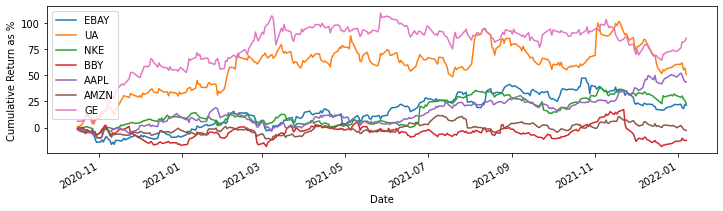

In [ ]:
cumul_return = (1 + stk_portfolio_returns).cumprod() - 1
cumul_return_perc = cumul_return*100

plt.figure(dpi=150)
cumul_return_perc.plot(figsize=(12,3))
plt.ylabel("Cumulative Return as %")

In [ ]:
# Portfolio Weights

N = len(stk_portfolio_returns.columns)
equal_weights = N * [1/N]

equal_weights

[0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285]

In [ ]:
from scipy.optimize import minimize

In [ ]:
def calculate_returns(weights,log_rets):
    return np.sum(log_rets.mean()*weights) * 252 #Annualized Returns

In [ ]:
log_rets_cov = log_rets.cov()
log_rets_cov

,EBAY,UA,NKE,BBY,AAPL,AMZN,GE
EBAY,0.000448,0.000051,0.000065,0.000134,0.000078,0.000094,0.000050
UA,0.000051,0.000575,0.000168,0.000158,0.000069,0.000043,0.000188
NKE,0.000065,0.000168,0.000280,0.000103,0.000086,0.000076,0.000040
BBY,0.000134,0.000158,0.000103,0.000469,0.000072,0.000061,0.000101
AAPL,0.000078,0.000069,0.000086,0.000072,0.000279,0.000170,0.000014
AMZN,0.000094,0.000043,0.000076,0.000061,0.000170,0.000258,-0.000028
GE,0.000050,0.000188,0.000040,0.000101,0.000014,-0.000028,0.000453


In [ ]:
# Function used to return portfolio volatility

def calculate_volatility(weights,log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [ ]:
def function_to_minimize(weights):
    # Note -1* because we need to minimize this
    # Its the same as maximizing the positive sharpe ratio
    return -1 * (calculate_returns(weights,log_rets)/calculate_volatility(weights,log_rets_cov))

In [ ]:
bounds = tuple((0,1) for n in range(N)) # Bound for each weighting (we only go long)

In [ ]:
# Need to constrain all weights to add up to 1
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})

In [ ]:
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)

     fun: -1.8331001980345598
     jac: array([-8.90761614e-04, -1.04406476e-03, -1.23125315e-03,  1.47856624e+00,
        5.53652644e-04,  8.05306852e-01, -2.60069966e-04])
 message: 'Optimization terminated successfully.'
    nfev: 85
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([2.27684466e-02, 4.73825046e-02, 3.87734734e-02, 0.00000000e+00,
       4.27844103e-01, 1.58056348e-16, 4.63231472e-01])

In [ ]:
minfun = minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)
perc_alloc = pd.DataFrame(minfun.x).T # array shown above as data frame 
perc_alloc.columns = ['EBAY','UA','NKE','BBY', 'AAPL', 'AMZN', 'GE']

In [ ]:
# Based on above results, here is the optimal portfolio allocation:
perc_alloc

,EBAY,UA,NKE,BBY,AAPL,AMZN,GE
0,0.022768,0.047383,0.038773,0.0,0.427844,1.580563e-16,0.463231


## Efficient Frontier

In [ ]:
expected_returns_range = np.linspace(0.1,0.4,100)

In [ ]:
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights)-1},
               {'type':'eq','fun': lambda weights: calculate_returns(weights,log_rets) - possible_return})

In [ ]:
def calculate_Volatility(weights):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [ ]:
frontier_volatility = []

for possible_return in expected_returns_range:
    # function for return
    
    
    result = minimize(calculate_Volatility,equal_weights,bounds=bounds,constraints=constraints)
    
    frontier_volatility.append(result['fun'])

In [ ]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/ np.sum(weights)

In [ ]:
# Create many random weights for monte-carlo simulation

mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []
for sim in range(6000):
    # This may take awhile!
    weights = gen_weights(N)
    mc_weights.append(weights)
    mc_portfolio_returns.append(calculate_returns(weights,log_rets))
    mc_portfolio_vol.append(calculate_volatility(weights,log_rets_cov))

In [ ]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

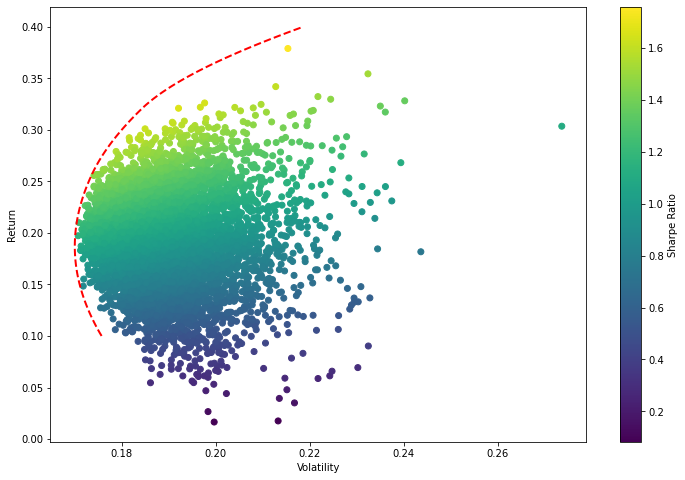

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add frontier line
plt.plot(frontier_volatility,expected_returns_range,'r--',linewidth=2)

# VaR

In [ ]:
perc_alloc

,EBAY,UA,NKE,BBY,AAPL,AMZN,GE
0,0.022768,0.047383,0.038773,0.0,0.427844,1.580563e-16,0.463231


In [ ]:
from scipy.stats import stats,norm

In [ ]:
confidence_level=0.99
n_days=10
z=norm.ppf(confidence_level)

In [ ]:
# Initial investment value for this new portfolio
invest_amnt = 1000000

In [ ]:
portf_analysis = pd.DataFrame()
portf_analysis = round(perc_alloc*invest_amnt, 2)
portf_analysis.columns = ['EBAY_position','UA_position','NKE_position','BBY_position','AAPL_position','AMZN_position','GE_position']

In [ ]:
# Current holdings
portf_analysis

,EBAY_position,UA_position,NKE_position,BBY_position,AAPL_position,AMZN_position,GE_position
0,22768.45,47382.5,38773.47,0.0,427844.1,0.0,463231.47


In [ ]:
EBAY_VaR_analysis = round(portf_analysis['EBAY_position']*z*np.std(stk_portfolio_returns['EBAY'])*np.sqrt(n_days), 2)
UA_VaR_analysis = round(portf_analysis['UA_position']*z*np.std(stk_portfolio_returns['UA'])*np.sqrt(n_days), 2)
NKE_VaR_analysis = round(portf_analysis['NKE_position']*z*np.std(stk_portfolio_returns['NKE'])*np.sqrt(n_days), 2)
BBY_VaR_analysis = round(portf_analysis['BBY_position']*z*np.std(stk_portfolio_returns['BBY'])*np.sqrt(n_days), 2)
AAPL_VaR_analysis = round(portf_analysis['AAPL_position']*z*np.std(stk_portfolio_returns['AAPL'])*np.sqrt(n_days), 2)
AMZN_VaR_analysis = round(portf_analysis['AMZN_position']*z*np.std(stk_portfolio_returns['AMZN'])*np.sqrt(n_days), 2)
GE_VaR_analysis = round(portf_analysis['GE_position']*z*np.std(stk_portfolio_returns['GE'])*np.sqrt(n_days), 2)

In [ ]:
portf_VaR = pd.DataFrame([EBAY_VaR_analysis, UA_VaR_analysis, NKE_VaR_analysis, BBY_VaR_analysis, AAPL_VaR_analysis, AMZN_VaR_analysis, GE_VaR_analysis]).T
portf_VaR.columns= ['EBAY_VaR','UA_Var','NKE_VaR','BBY_VaR','AAPL_VaR','AMZN_VaR','GE_VaR']

In [ ]:
# 10 day VaR
portf_VaR

,EBAY_VaR,UA_Var,NKE_VaR,BBY_VaR,AAPL_VaR,AMZN_VaR,GE_VaR
0,3524.76,8415.14,4851.54,0.0,52482.69,0.0,72819.78


In [ ]:
# 10 day portfolio VaR
portf_VaR.sum(axis=1)

0    142093.91
dtype: float64

In [ ]:
portf_analysis = portf_analysis.join(portf_VaR)
portf_analysis

,EBAY_position,UA_position,NKE_position,BBY_position,AAPL_position,AMZN_position,GE_position,EBAY_VaR,UA_Var,NKE_VaR,BBY_VaR,AAPL_VaR,AMZN_VaR,GE_VaR
0,22768.45,47382.5,38773.47,0.0,427844.1,0.0,463231.47,3524.76,8415.14,4851.54,0.0,52482.69,0.0,72819.78


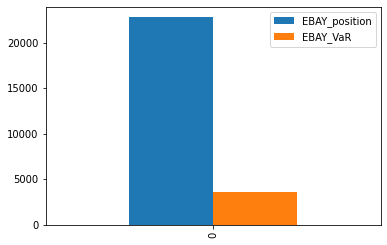

In [ ]:
portf_analysis[['EBAY_position', 'EBAY_VaR']].plot.bar()

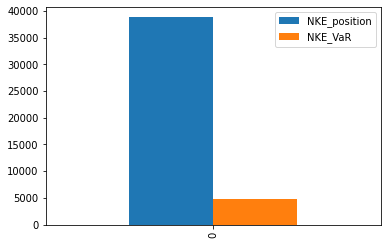

In [ ]:
portf_analysis[['NKE_position', 'NKE_VaR']].plot.bar()

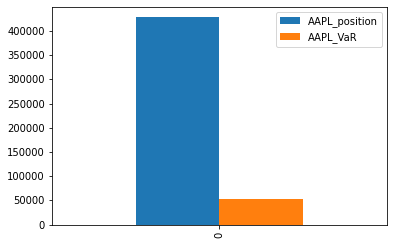

In [ ]:
portf_analysis[['AAPL_position', 'AAPL_VaR']].plot.bar()

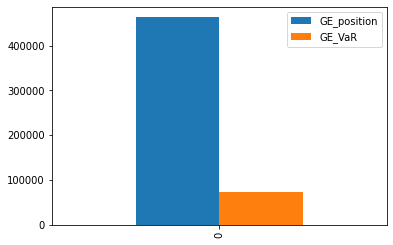

In [ ]:
portf_analysis[['GE_position', 'GE_VaR']].plot.bar()

In [ ]:
print('EBAY % VaR:', round(float(portf_analysis['EBAY_VaR']/portf_analysis['EBAY_position'])*100, 2))
print('EBAY % portfolio allocation:', round(float(perc_alloc['EBAY'])*100,2))

EBAY % VaR: 15.48
EBAY % portfolio allocation: 2.28


In [ ]:
print('NKE % VaR:', round(float(portf_analysis['NKE_VaR']/portf_analysis['NKE_position'])*100,2))
print('NKE % portfolio allocation:', round(float(perc_alloc['NKE'])*100,2))

NKE % VaR: 12.51
NKE % portfolio allocation: 3.88


In [ ]:
print('AAPL % VaR:', round(float(portf_analysis['AAPL_VaR']/portf_analysis['AAPL_position'])*100,2))
print('AAPL % portfolio allocation:', round(float(perc_alloc['AAPL'])*100,2))

AAPL % VaR: 12.27
AAPL % portfolio allocation: 42.78


In [ ]:
print('GE % VaR:', round(float(portf_analysis['GE_VaR']/portf_analysis['GE_position'])*100,2))
print('GE % portfolio allocation:', round(float(perc_alloc['GE'])*100,2))

GE % VaR: 15.72
GE % portfolio allocation: 46.32
